# Simple Neural Network Music Genre Classification:

This notebook is dedicated to improving the test accuracy of the network presented in:
https://www.kaggle.com/code/aasimahmed04/music-genre-classifier

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MaxAbsScaler
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import librosa, IPython
import librosa.display as lplt

from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from keras import regularizers

import IPython.display as ipd
from IPython.display import Audio

## 1. Load And Arrange The Data

The data set is included a .csv file with the extracted features:

In [2]:
df = pd.read_csv('features_30_sec.csv')

#### Check If The Data Is Balanced:

Class Balance:

In [3]:
df.label.value_counts().reset_index()

,label,count
0,blues,100
1,classical,100
2,country,100
3,disco,100
4,hiphop,100
5,jazz,100
6,metal,100
7,pop,100
8,reggae,100
9,rock,100


We have exactly 100 samples out of each class.

In [4]:
data = df.iloc[:,1:59];
labels_str = df['label'];

Map labels to numbers:

In [5]:
map_ = {
    "blues"     : 0,
    "classical" : 1,
    "country"   : 2,
    "disco"     : 3,
    "hiphop"    : 4,
    "jazz"      : 5,
    "metal"     : 6,
    "pop"       : 7,
    "reggae"    : 8,
    "rock"      : 9,
}

In [6]:
labels = np.array([map_[label_] for label_ in labels_str])

## 2. Pre-Processing:

Scale the data to prevent feature imbalances:

In [7]:
data_scaler = MaxAbsScaler().fit(data);

In [8]:
scaled_data = data_scaler.transform(data);

Convert to float64 for better computation:

In [9]:
scaled_data.astype('float64', casting = 'same_kind');

Split the data to train and test:

In [10]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, labels, test_size=0.15,shuffle=True, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,shuffle=True, random_state=1)

In [11]:
print("Train data size: ", X_train.shape);
print("Validation data size: ",X_val.shape);
print("Test data size: ", X_test.shape);

Train data size:  (680, 58)
Validation data size:  (170, 58)
Test data size:  (150, 58)


## 4. Defining The Network:

In [12]:
#Creating a Neural Network
model = Sequential() 
  
model.add(Flatten(input_shape=(58,))) 
model.add(Dense(256, activation='relu')) 
model.add(BatchNormalization()) 
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.3))  
model.add(Dense(10, activation='softmax')) 

model.summary()

C:\Users\420\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 58)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          15,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,314 (196.54 KB)

 Trainable params: 49,802 (194.54 KB)

 Non-trainable params: 512 (2.00 KB)

Compiling and fitting:

In [13]:
#Compiling & Fitting the Model
adam = keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=adam, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
hist = model.fit(X_train, y_train, validation_data= (X_val, y_val),
                epochs=100,
                batch_size=32)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.1152 - loss: 2.6655 - val_accuracy: 0.1412 - val_loss: 2.2963
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1725 - loss: 2.3838 - val_accuracy: 0.2647 - val_loss: 2.2704
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2699 - loss: 2.1232 - val_accuracy: 0.3059 - val_loss: 2.2409
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3521 - loss: 1.9646 - val_accuracy: 0.3412 - val_loss: 2.2088
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3541 - loss: 1.8847 - val_accuracy: 0.3529 - val_loss: 2.1736
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4365 - loss: 1.6912 - val_accuracy: 0.4059 - val_loss: 2.1314
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4398 - loss: 1.5915 - val_accuracy: 0.4706 - val_loss: 2.0871
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4561 - loss: 1.5659 - val_accuracy: 0.4882 - 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7946 - loss: 0.6341 - val_accuracy: 0.7176 - val_loss: 0.8291
Epoch 52/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8282 - loss: 0.6181 - val_accuracy: 0.7118 - val_loss: 0.8239
Epoch 53/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8518 - loss: 0.5622 - val_accuracy: 0.7235 - val_loss: 0.8206
Epoch 54/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8125 - loss: 0.6086 - val_accuracy: 0.7118 - val_loss: 0.8186
Epoch 55/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8061 - loss: 0.6055 - val_accuracy: 0.7118 - val_loss: 0.8156
Epoch 56/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7997 - loss: 0.6236 - val_accuracy: 0.7059 - val_loss: 0.8150
Epoch 57/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8062 - loss: 0.6039 - val_accuracy: 0.7176 - val_loss: 0.8068
Epoch 58/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8431 - loss: 0.5661 - val_accuracy: 0.7294 - val_lo

Test set:

In [14]:
y_predict = np.argmax(model.predict(X_test),axis=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [15]:
#Test Accuracy
acc = np.mean(y_predict == y_test)*100
print("test accuracy = %.2f"%acc, "%");

test accuracy = 68.67 %


Plot original scores:

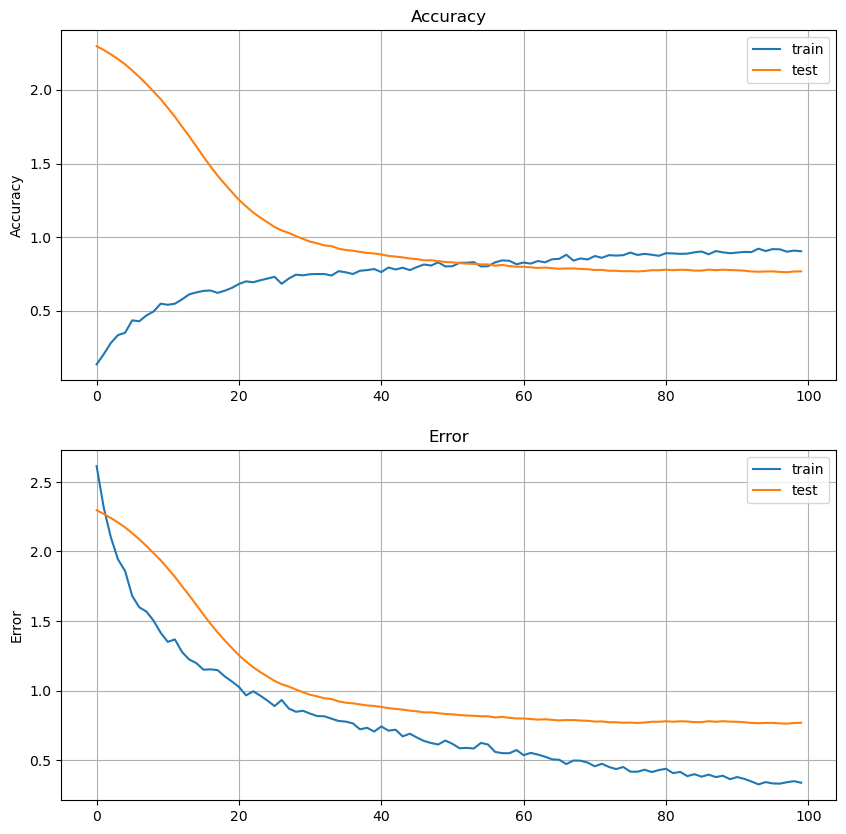

In [16]:
fig, axs = plt.subplots(2, figsize=(10, 10))

#Accuracy
axs[0].plot(hist.history['accuracy'], label="train")
axs[0].plot(hist.history['val_loss'], label="test")
axs[0].set_ylabel("Accuracy")
axs[0].legend()
axs[0].set_title("Accuracy")
axs[0].grid()

#Error
axs[1].plot(hist.history["loss"], label="train") 
axs[1].plot(hist.history["val_loss"], label="test")     
axs[1].set_ylabel("Error") 
axs[1].legend() 
axs[1].set_title("Error") 
axs[1].grid()  
    
plt.show()

#### Confusion Matrix

In [17]:
cm = confusion_matrix(y_test, y_predict);

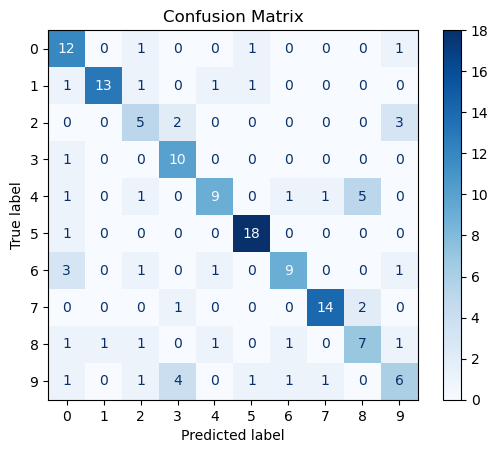

In [18]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format="d")

plt.title('Confusion Matrix')
plt.show()

# Improving The Network:

In [19]:
#Creating a Neural Network
model = Sequential() 
  
model.add(Flatten(input_shape=(58,))) 
model.add(Dense(256, activation='relu')) 
model.add(BatchNormalization()) 
model.add(Dense(128,kernel_regularizer=regularizers.l2(0.0005), activation='relu')) 
model.add(Dropout(0.3)) 
model.add(Dense(10, activation='softmax')) 

model.summary()

C:\Users\420\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 58)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │          15,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,314 (196.54 KB)

 Trainable params: 49,802 (194.54 KB)

 Non-trainable params: 512 (2.00 KB)

In [20]:
#Compiling & Fitting the Model
adam = keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=adam, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
hist = model.fit(X_train, y_train, validation_data= (X_val, y_val),
                epochs=100,
                batch_size=32)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.1198 - loss: 2.7677 - val_accuracy: 0.1000 - val_loss: 2.3789
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2171 - loss: 2.3259 - val_accuracy: 0.1647 - val_loss: 2.3509
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2988 - loss: 2.1485 - val_accuracy: 0.2059 - val_loss: 2.3217
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3022 - loss: 2.0433 - val_accuracy: 0.3118 - val_loss: 2.2878
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3794 - loss: 1.9033 - val_accuracy: 0.3471 - val_loss: 2.2519
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4205 - loss: 1.7879 - val_accuracy: 0.3471 - val_loss: 2.2130
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4430 - loss: 1.6759 - val_accuracy: 0.3706 - val_loss: 2.1722
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4516 - loss: 1.6196 - val_accuracy: 0.4412 - 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8266 - loss: 0.6668 - val_accuracy: 0.7235 - val_loss: 0.9049
Epoch 52/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8431 - loss: 0.6713 - val_accuracy: 0.7294 - val_loss: 0.9005
Epoch 53/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8333 - loss: 0.6416 - val_accuracy: 0.7235 - val_loss: 0.8998
Epoch 54/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8248 - loss: 0.6329 - val_accuracy: 0.7176 - val_loss: 0.8966
Epoch 55/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8278 - loss: 0.6507 - val_accuracy: 0.7294 - val_loss: 0.8884
Epoch 56/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8588 - loss: 0.5821 - val_accuracy: 0.7353 - val_loss: 0.8883
Epoch 57/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8280 - loss: 0.6548 - val_accuracy: 0.7353 - val_loss: 0.8861
Epoch 58/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8570 - loss: 0.5998 - val_accuracy: 0.7294 - val_lo

Test set:

In [21]:
y_predict = np.argmax(model.predict(X_test),axis=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [22]:
#Test Accuracy
acc = np.mean(y_predict == y_test)*100
print("test accuracy = %.2f"%acc, "%");

test accuracy = 74.67 %


Plot scores:

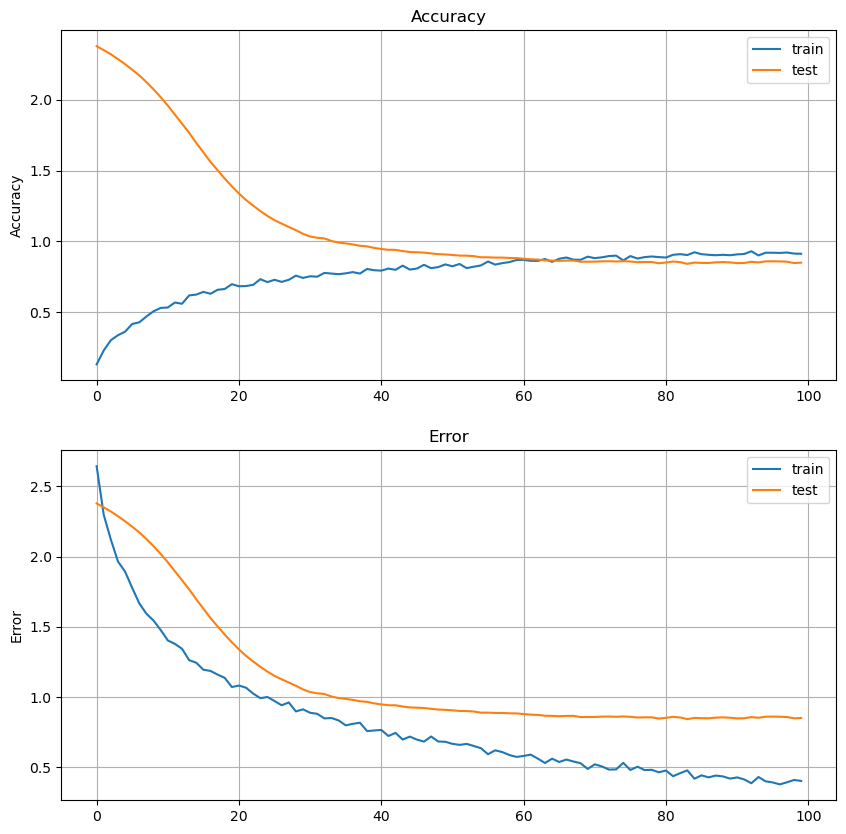

In [23]:
fig, axs = plt.subplots(2, figsize=(10, 10))

#Accuracy
axs[0].plot(hist.history['accuracy'], label="train")
axs[0].plot(hist.history['val_loss'], label="test")
axs[0].set_ylabel("Accuracy")
axs[0].legend()
axs[0].set_title("Accuracy")
axs[0].grid()

#Error
axs[1].plot(hist.history["loss"], label="train") 
axs[1].plot(hist.history["val_loss"], label="test")     
axs[1].set_ylabel("Error") 
axs[1].legend() 
axs[1].set_title("Error") 
axs[1].grid()

plt.show()

#### Confusion Matrix

In [24]:
cm = confusion_matrix(y_test, y_predict);

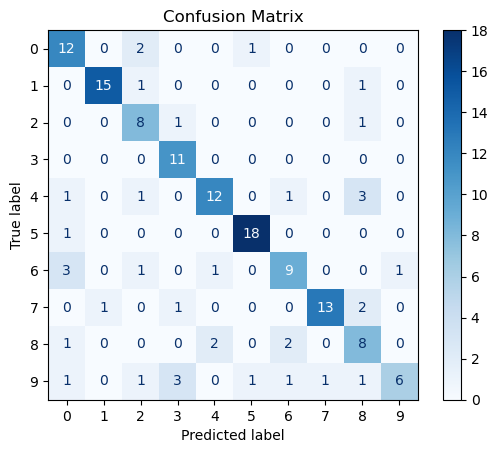

In [25]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format="d")

plt.title('Confusion Matrix')
plt.show()